Voting
First -- First Place Votes
Totals
G -- Games
Per Game
MP -- Minutes Played Per Game
PTS -- Points Per Game
TRB -- Total Rebounds Per Game
AST -- Assists Per Game
STL -- Steals Per Game
BLK -- Blocks Per Game
Shooting
FG% -- Field Goal Percentage
3P% -- 3-Point Field Goal Percentage
FT% -- Free Throw Percentage
Advanced
WS -- Win Shares
An estimate of the number of wins contributed by a player.
WS/48 -- Win Shares Per 48 Minutes
An estimate of the number of wins contributed by a player per 48 minutes (league average is approximately .100)

In [63]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [64]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Users\marta\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['plt', 'clf']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [65]:
# read the winner players other season that it will use for training model

mvp_win_train = pd.read_csv('Data/MVP Winners.csv', sep=';',header=0)

In [66]:
#Reffill datas NAN to 0
mvp_win_train.fillna(0, inplace=True) 

In [67]:
mvp_win_train.sample(50)

,season,player,win_pct,votes_first,points_won,points_max,award_share,g,mp_per_g,pts_per_g,trb_per_g,ast_per_g,stl_per_g,blk_per_g,fg_pct,fg3_pct,ft_pct,ws,ws_per_48
289,1995-96,Scottie Pippen,0.878049,0.0,226.0,1130.0,0.200,77.0,36.7,19.4,6.4,5.9,1.7,0.7,0.463,0.374,0.679,12.3,0.209
590,2013-14,Mike Conley,0.609756,0.0,1.0,1250.0,0.001,73.0,33.5,17.2,2.9,6.0,1.5,0.2,0.450,0.361,0.815,8.2,0.161
222,1991-92,Michael Jordan,0.817073,80.0,900.0,960.0,0.938,80.0,38.8,30.1,6.4,6.1,2.3,0.9,0.519,0.270,0.832,17.7,0.274
277,1994-95,John Stockton,0.731707,1.0,47.0,1050.0,0.045,82.0,35.0,14.7,3.1,12.3,2.4,0.3,0.542,0.449,0.804,13.9,0.233
483,2006-07,Carmelo Anthony,0.548780,0.0,1.0,1290.0,0.001,65.0,38.2,28.9,6.0,3.8,1.2,0.4,0.476,0.268,0.808,7.3,0.140
24,1980-81,Walter Davis,0.695122,0.0,3.0,690.0,0.004,78.0,28.0,18.0,2.6,3.9,1.2,0.2,0.539,0.412,0.836,7.1,0.157
169,1988-89,Magic Johnson,0.695122,42.5,664.5,850.0,0.782,77.0,37.5,22.5,7.9,12.8,1.8,0.3,0.509,0.314,0.911,16.1,0.267
22,1980-81,Bob Lanier,0.731707,0.0,4.0,690.0,0.006,67.0,26.2,14.3,6.2,2.7,1.1,1.2,0.525,1.000,0.751,6.8,0.185
488,2007-08,Kevin Garnett,0.804878,15.0,670.0,1260.0,0.532,71.0,32.8,18.8,9.2,3.4,1.4,1.3,0.539,0.000,0.801,12.9,0.265
157,1987-88,Dominique Wilkins,0.609756,0.0,55.0,800.0,0.069,78.0,37.8,30.7,6.4,2.9,1.3,0.6,0.464,0.295,0.826,9.8,0.160


In [68]:
mvp_win_train.dropna()

,season,player,win_pct,votes_first,points_won,points_max,award_share,g,mp_per_g,pts_per_g,trb_per_g,ast_per_g,stl_per_g,blk_per_g,fg_pct,fg3_pct,ft_pct,ws,ws_per_48
0,1980-81,Julius Erving,0.756098,28.0,454.0,690.0,0.658,82.0,35.0,24.6,8.0,4.4,2.1,1.8,0.521,0.222,0.787,13.8,0.231
1,1980-81,Larry Bird,0.756098,20.0,423.0,690.0,0.613,82.0,39.5,21.2,10.9,5.5,2.0,0.8,0.478,0.270,0.863,10.8,0.160
2,1980-81,Kareem Abdul-Jabbar,0.658537,8.0,286.0,690.0,0.414,80.0,37.2,26.2,10.3,3.4,0.7,2.9,0.574,0.000,0.766,14.3,0.230
3,1980-81,Moses Malone,0.487805,8.0,180.0,690.0,0.261,80.0,40.6,27.8,14.8,1.8,1.0,1.9,0.522,0.333,0.757,13.7,0.202
4,1980-81,George Gervin,0.634146,1.0,83.0,690.0,0.120,82.0,33.7,27.1,5.1,3.2,1.1,0.7,0.492,0.257,0.826,10.5,0.182
5,1980-81,Marques Johnson,0.731707,1.0,73.0,690.0,0.106,76.0,33.4,20.3,6.8,4.6,1.5,0.5,0.552,0.000,0.706,11.2,0.211
6,1980-81,Robert Parish,0.756098,0.0,53.0,690.0,0.077,82.0,28.0,18.9,9.5,1.8,1.0,2.6,0.545,0.000,0.710,10.9,0.228
7,1980-81,Dennis Johnson,0.695122,0.0,50.0,690.0,0.072,79.0,33.1,18.8,4.6,3.7,1.7,0.8,0.436,0.216,0.820,8.4,0.154
8,1980-81,Tiny Archibald,0.756098,0.0,32.0,690.0,0.046,80.0,35.3,13.8,2.2,7.7,0.9,0.2,0.499,0.000,0.816,6.9,0.118
9,1980-81,Jamaal Wilkes,0.658537,0.0,19.0,690.0,0.028,81.0,37.4,22.6,5.4,2.9,1.5,0.4,0.526,0.077,0.758,8.5,0.135


In [69]:
#Analyze the basics stadistics
mvp_win_train.describe()

,win_pct,votes_first,points_won,points_max,award_share,g,mp_per_g,pts_per_g,trb_per_g,ast_per_g,stl_per_g,blk_per_g,fg_pct,fg3_pct,ft_pct,ws,ws_per_48
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,0.619196,6.400616,166.371186,1039.383667,0.156200,74.996918,36.329738,22.003852,7.459014,5.002003,1.427735,0.981664,0.494359,0.257590,0.780200,10.697227,0.187664
std,0.136740,20.260660,284.687084,206.787425,0.257948,9.327048,3.035173,5.170927,3.293852,2.832676,0.584946,0.928818,0.045544,0.153609,0.087698,3.365836,0.048555
min,0.000000,0.000000,1.000000,690.000000,0.001000,17.000000,23.600000,4.700000,1.900000,0.800000,0.200000,0.000000,0.384000,0.000000,0.422000,2.300000,0.046000
25%,0.548780,0.000000,3.000000,800.000000,0.004000,73.000000,34.600000,18.800000,4.800000,2.800000,1.000000,0.300000,0.463000,0.167000,0.737000,8.500000,0.155000
50%,0.646341,0.000000,23.000000,1130.000000,0.021000,79.000000,36.700000,22.000000,6.900000,4.300000,1.400000,0.600000,0.492000,0.302000,0.790000,10.600000,0.187000
75%,0.696970,1.000000,184.000000,1230.000000,0.177000,81.000000,38.300000,25.700000,10.400000,6.700000,1.800000,1.400000,0.523000,0.365000,0.843000,12.900000,0.218000
max,0.890244,131.000000,1310.000000,1310.000000,1.000000,82.000000,43.700000,37.100000,18.700000,14.500000,3.700000,5.600000,0.670000,1.000000,0.948000,21.200000,0.322000


In [70]:
mvp_win_train.columns

Index(['season', 'player', 'win_pct', 'votes_first', 'points_won',
       'points_max', 'award_share', 'g', 'mp_per_g', 'pts_per_g', 'trb_per_g',
       'ast_per_g', 'stl_per_g', 'blk_per_g', 'fg_pct', 'fg3_pct', 'ft_pct',
       'ws', 'ws_per_48'],
      dtype='object')

In [71]:
mvp_win_train.columns[mvp_win_train.dtypes==double]

Index(['win_pct', 'votes_first', 'points_won', 'points_max', 'award_share',
       'g', 'mp_per_g', 'pts_per_g', 'trb_per_g', 'ast_per_g', 'stl_per_g',
       'blk_per_g', 'fg_pct', 'fg3_pct', 'ft_pct', 'ws', 'ws_per_48'],
      dtype='object')

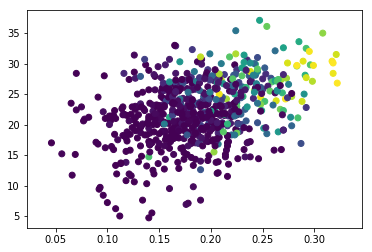

In [72]:
plt.scatter(mvp_win_train["ws_per_48"],mvp_win_train["pts_per_g"],c=mvp_win_train["award_share"]);

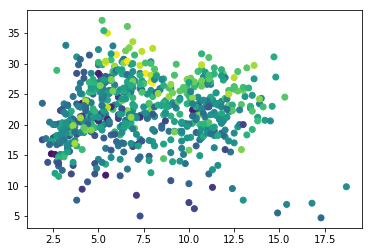

In [73]:
plt.scatter(mvp_win_train["trb_per_g"],mvp_win_train["pts_per_g"],c=mvp_win_train["ws_per_48"]);

In [74]:
X = mvp_win_train.drop(['season', 'player', 'votes_first', 'points_won','points_max', 'award_share'], axis=1)
y = mvp_win_train['award_share']

In [75]:
mvp_win_train[['g', 'mp_per_g', 'pts_per_g', 'trb_per_g','ast_per_g', 'stl_per_g', 'blk_per_g', 'fg_pct', 'fg3_pct', 
                   'ft_pct','ws', 'ws_per_48']].values

array([[82.   , 35.   , 24.6  , ...,  0.787, 13.8  ,  0.231],
       [82.   , 39.5  , 21.2  , ...,  0.863, 10.8  ,  0.16 ],
       [80.   , 37.2  , 26.2  , ...,  0.766, 14.3  ,  0.23 ],
       ...,
       [73.   , 36.   , 22.9  , ...,  0.656,  6.8  ,  0.124],
       [81.   , 31.8  , 15.9  , ...,  0.636, 14.4  ,  0.268],
       [55.   , 35.2  , 27.4  , ...,  0.665,  7.2  ,  0.179]])

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1)

In [82]:
# Load the library
from sklearn.neighbors import KNeighborsRegressor
# Create an instance
MVP_KNB = KNeighborsRegressor(n_neighbors=2)
# Fit the data
MVP_KNB.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=2, p=2,
          weights='uniform')

In [84]:
from sklearn.metrics import mean_absolute_error

In [85]:
mean_absolute_error(y_test,regk.predict(X_test))

0.05037692307692309

In [77]:
from sklearn.tree import DecisionTreeRegressor
MVP_DTR = DecisionTreeRegressor(max_depth=5)
MVP_DTR.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [78]:
from sklearn.metrics import mean_squared_error

In [79]:
np.sqrt(mean_squared_error(y_test,MVP_DTR.predict(X_test)))

0.2065532118848835